<a href="https://colab.research.google.com/github/sharadnataraj96/Gas-Turbine-Emission-prediction/blob/Decision-Tree-Regression/Gas_Turbine_Decision_Tree_Regressison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_1 = pd.read_csv("/content/drive/My Drive/Dataset/gt_2011.csv")
X= data_1.iloc[:, :-2].values
Y=data_1.iloc[:, -2:].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [19]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [20]:
y_pred = regressor.predict(X_test)

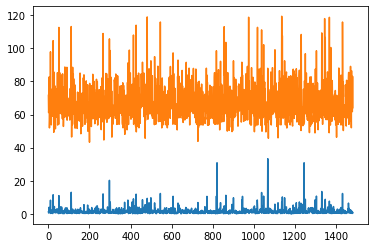

In [21]:
plt.plot(y_pred)

In [22]:
rss = np.sum(np.square(y_test - y_pred))
print(rss)

42343.815626230105


In [23]:
print(y_pred)

[[ 1.2756  71.551  ]
 [ 0.60643 61.182  ]
 [ 0.92481 62.827  ]
 ...
 [ 0.77954 61.744  ]
 [ 0.31753 83.032  ]
 [ 0.83632 64.092  ]]
